# Time Series Classification - Comparison

### Giada Confortola & Batuhan Tüter 
### AIM3 - Scalable Data Science | WiSe 30.11.2018 


In [29]:
import tslearn as ts
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.svm import TimeSeriesSVC
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.datasets import CachedDatasets
from tslearn.shapelets import ShapeletModel
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

## Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col52,col53,col54,col55,col56,col57,col58,col59,col60,label
0,-0.376936,1.224864,0.343874,0.328454,-0.337609,1.026514,-1.330996,-0.657800,1.446077,-0.846397,...,-1.568165,1.021863,-1.429748,1.356966,1.372781,0.663558,0.918346,-1.311742,-1.197146,1
1,0.644406,0.413269,-0.862278,-1.497386,-0.421458,-0.214215,-1.292131,0.956898,-1.216140,-0.588536,...,-0.802528,-1.121287,0.989319,-1.109687,0.219856,0.630034,1.398140,0.085742,0.024997,1
2,-0.978667,-0.406232,0.822429,-1.408242,-1.676734,-0.490632,1.404598,1.168600,-1.703254,0.972810,...,-0.762884,1.382972,-0.869103,1.277252,-0.198967,0.966809,0.666129,0.106996,0.082715,1
3,-0.236537,-0.098175,0.367092,1.366860,0.498281,-0.300223,1.715634,0.902108,-0.218132,-1.430721,...,-1.499604,0.406744,1.289153,-1.119731,-0.995985,1.651135,-1.187098,0.025463,-0.841518,1
4,1.490735,1.325243,1.626829,-0.317056,-1.098990,-0.022213,0.596980,1.667339,-0.206153,-1.376627,...,1.029995,-1.496161,-1.167442,1.484208,-0.373020,-0.843281,-0.209794,0.137724,0.716542,1


In [3]:
y_train = np.array(train['label'])
X_train = np.array(train.drop(columns='label', axis=0))

In [4]:
y_test = np.array(test['label'])
X_test = np.array(test.drop(columns='label', axis=0))

## Visualization

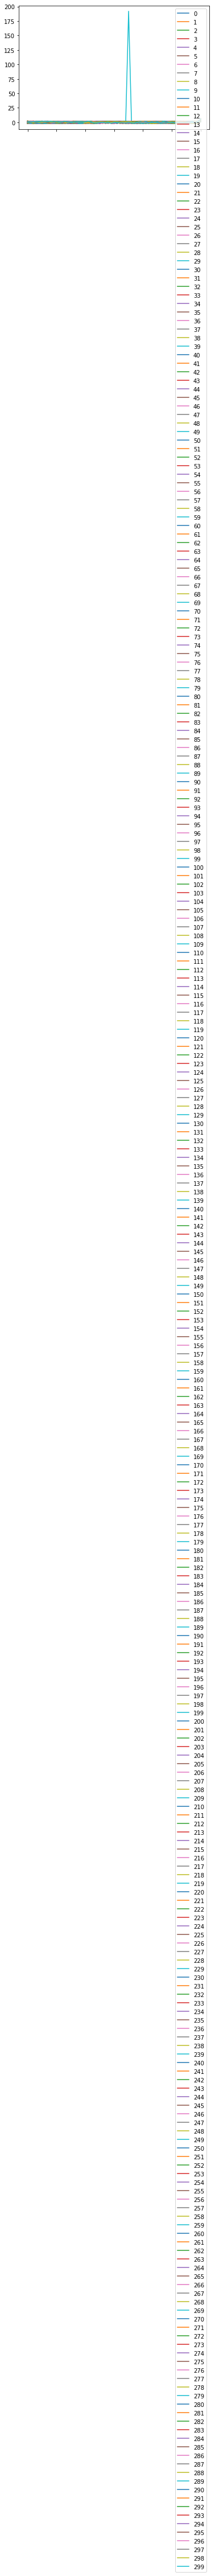

In [5]:
train.T.plot()

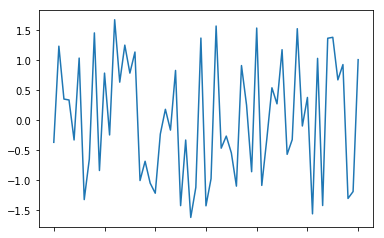

In [6]:
train.iloc[0].plot()

In [7]:
train.drop(train.index[139], inplace=True)

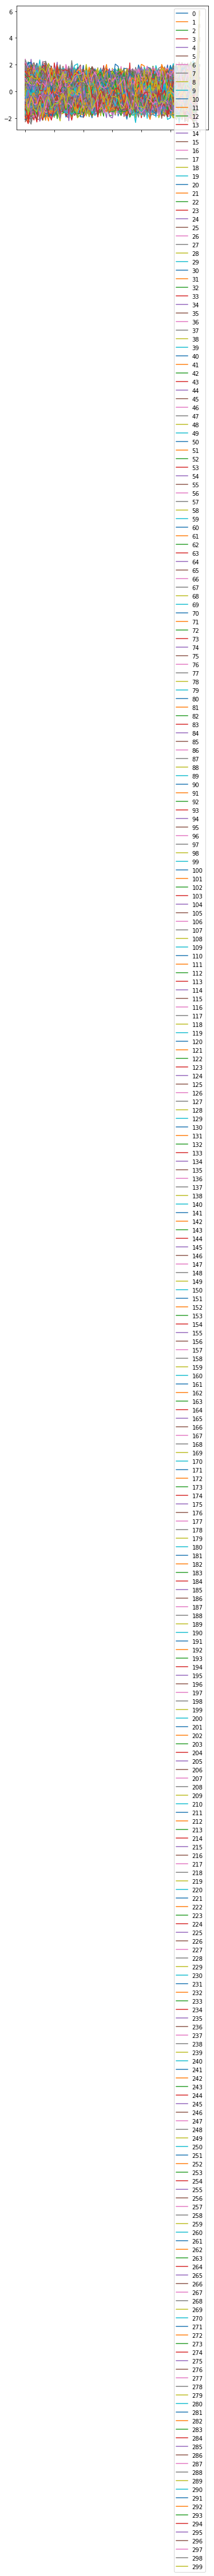

In [8]:
train.T.plot()

In [9]:
label_sets = {}
label_sets['1'] = train[train['label']==1].iloc[:,0:-1]
label_sets['2'] = train[train['label']==2].iloc[:,0:-1]
label_sets['3'] = train[train['label']==3].iloc[:,0:-1]
label_sets['4'] = train[train['label']==4].iloc[:,0:-1]
label_sets['5'] = train[train['label']==5].iloc[:,0:-1]
label_sets['6'] = train[train['label']==6].iloc[:,0:-1]

sums = {}
for key in label_sets:
    sums[key] = label_sets[key].iloc[:,1:].sum(axis=0) / label_sets[key].shape[0]

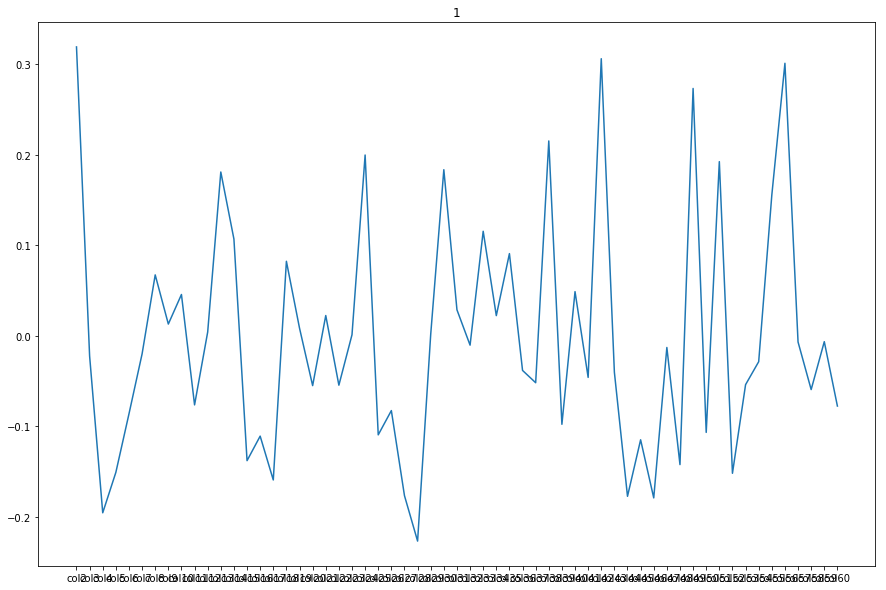

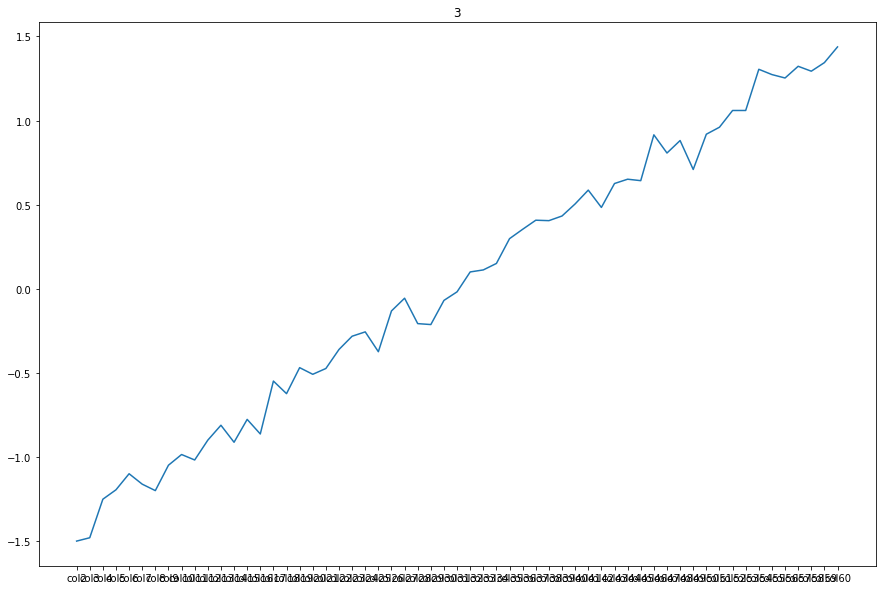

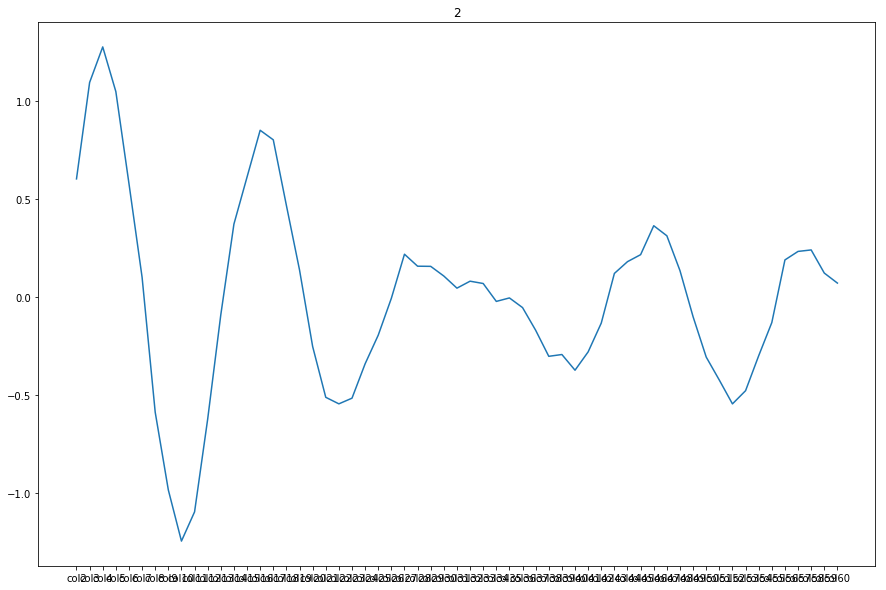

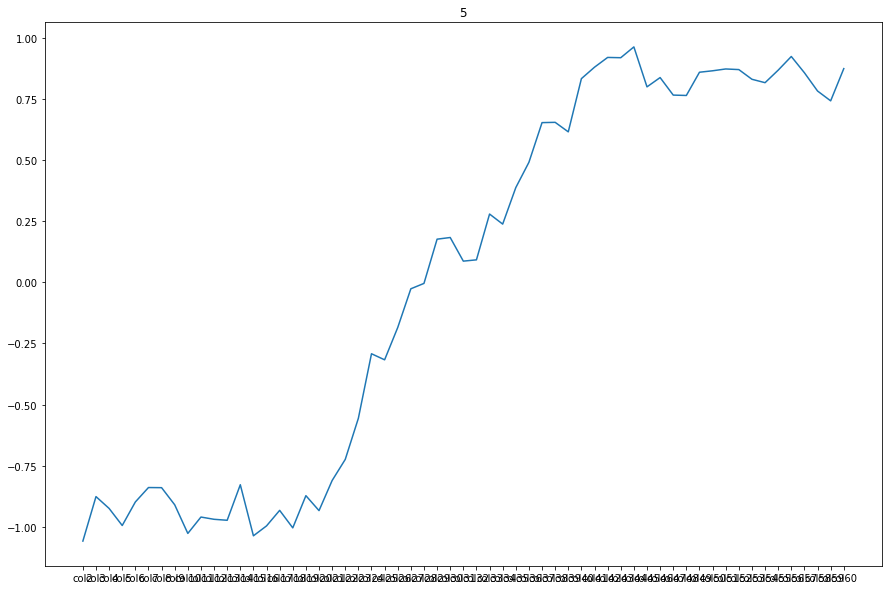

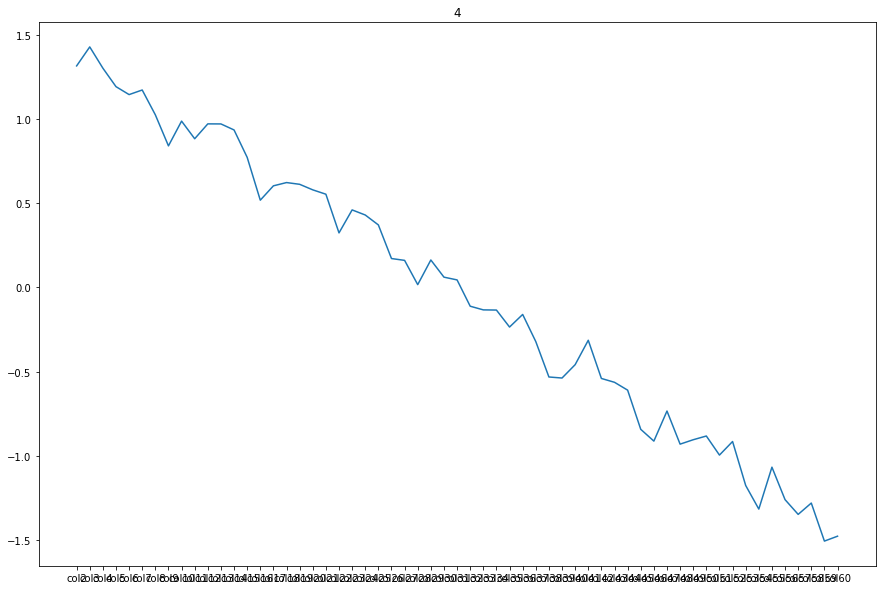

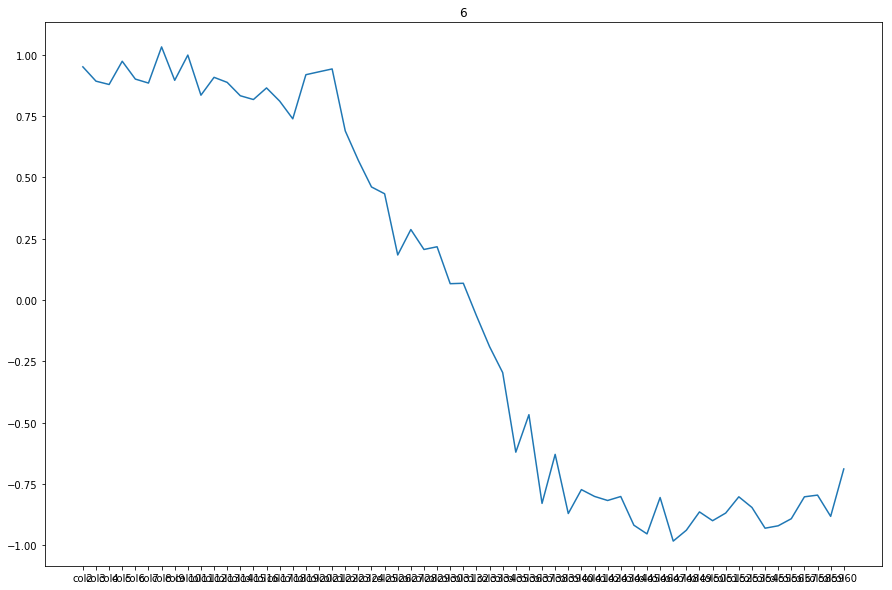

In [10]:
days = [ r for r in range(sums['1'].shape[0])]
def plot_with_fft(key):
    fig = plt.figure(1,figsize=[15,10])
    plt.title(key)
    plt.plot(sums[key],label = key )
    plt.show()
    
for key in sums:
    plot_with_fft(key)

In [11]:
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

## Building a model

### KNN

In [18]:
knn = KNeighborsTimeSeriesClassifier(1)
knn.fit(X_train, y_train)

In [19]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6])

In [20]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [21]:
print("Correct classification rate:", knn.score(X_test, y_test))

('Correct classification rate:', 0.96)


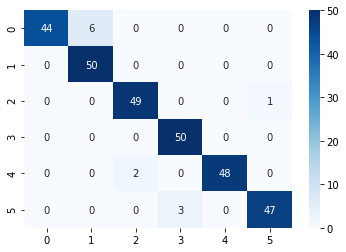

In [22]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_knn),  annot=True, cmap="Blues")

### Shapelet

In [31]:
sl = ShapeletModel(n_shapelets_per_size={10: 5}, max_iter=10000, verbose_level=0)
sl.fit(X_train, y_train)

ShapeletModel(batch_size=256, max_iter=10000, n_shapelets_per_size={10: 5},
       optimizer='sgd', random_state=None, verbose_level=0,
       weight_regularizer=0.0)

In [32]:
y_pred_st = sl.predict(X_test)

In [33]:
y_pred_st

array([1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 4, 2, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 1, 3, 4, 3, 3, 3, 4, 4,
       4, 3, 3, 3, 1, 1, 4, 3, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 2, 2, 5,
       1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 4, 4, 4, 6, 4, 6, 4, 4, 6, 4, 4, 4,
       4, 4, 6, 6, 6, 6, 6, 4, 4, 4, 4, 6, 4, 6, 4, 4, 6, 4, 6, 4, 4, 6,
       6, 4, 6, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6])

In [34]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [35]:
print("Correct classification rate:", sl.score(X_test, y_test))

('Correct classification rate:', 0.7)


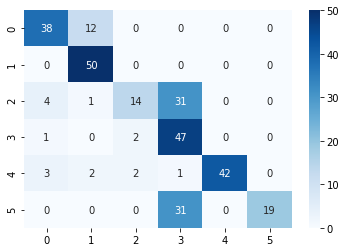

In [36]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_st),  annot=True, cmap="Blues")

### Definite Kernel - SVC

In [12]:
svc = TimeSeriesSVC(kernel='gak', gamma='auto', sz=X_train.shape[1], d=X_train.shape[2])
svc.fit(X_train, y_train)

TimeSeriesSVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, d=1,
       decision_function_shape='ovr', degree=3, gamma='auto',
       kernel=<function <lambda> at 0x7f46b50898c0>, max_iter=-1,
       probability=False, random_state=None, shrinking=True, sz=60,
       tol=0.001, verbose=False)

In [13]:
y_pred_svc = svc.predict(X_test)

In [14]:
y_pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [15]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [16]:
print("Correct classification rate:", svc.score(X_test, y_test))

('Correct classification rate:', 0.98)


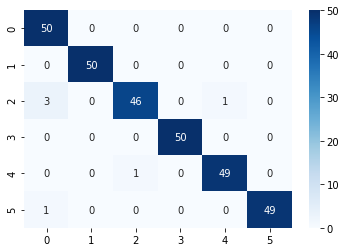

In [17]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_svc),  annot=True, cmap="Blues")

## Comparison

In [38]:
precision_recall_fscore_support(y_test, y_pred_knn)

(array([1.        , 0.89285714, 0.96078431, 0.94339623, 1.        ,
        0.97916667]),
 array([0.88, 1.  , 0.98, 1.  , 0.96, 0.94]),
 array([0.93617021, 0.94339623, 0.97029703, 0.97087379, 0.97959184,
        0.95918367]),
 array([50, 50, 50, 50, 50, 50]))

In [37]:
precision_recall_fscore_support(y_test, y_pred_st)

(array([0.82608696, 0.76923077, 0.77777778, 0.42727273, 1.        ,
        1.        ]),
 array([0.76, 1.  , 0.28, 0.94, 0.84, 0.38]),
 array([0.79166667, 0.86956522, 0.41176471, 0.5875    , 0.91304348,
        0.55072464]),
 array([50, 50, 50, 50, 50, 50]))

In [39]:
precision_recall_fscore_support(y_test, y_pred_svc)

(array([0.92592593, 1.        , 0.9787234 , 1.        , 0.98      ,
        1.        ]),
 array([1.  , 1.  , 0.92, 1.  , 0.98, 0.98]),
 array([0.96153846, 1.        , 0.94845361, 1.        , 0.98      ,
        0.98989899]),
 array([50, 50, 50, 50, 50, 50]))